1.


(a)

difference:

simple linear regression model fits the relation between 1 independent variable and a dependent variable.

While multiple linear regression models the relation between 1 dependent variable and multiple independent variables.

advantage of the latter:

Since multiple linear regression model can hold several different independent variables, it can not only show many different independent variables' influence on the dependent variable(each), but also bring a view of how those independent variable have an interplay of different predictors on the outcome.

(b)

continues variables:

form: y=β0 + β1x + ϵ
It model a relationship across a range of variables and show how y changes with x. And the beta1 value is the slope of the line(rate of change). 

Indicator variables:

form: y=β0 + β1*predicatorA + ϵ (PredicatorA ϵ {0,1})
It compares the mean value of y in each group. The beta1 for indicator model represents the difference of the mean in two groups.

(c)

Two linear forms:

simple:
y=β0+β1x+ϵ

add indicator:
y=β0+β1x+β2D+ϵ (D is the indicator, 0 or 1 represents different groups)

Change in behavior:

When D=0:

y=β0+β1x+ϵ

When D=1:

y=(β0+β2)+β1x+ϵ

β0: Baseline intercept for the reference group (D=0).

β1: Common slope; effect of x on y for both groups. 

β2: Difference in intercepts between groups; represents the average difference in y between groups when x=0.

(d)

Linear form:

y=β0 + β1x + β2D + β3xD + ϵ 

xD: Interaction term between x and D.

β0: Intercept for the reference group when x=0.

β1: Slope of y with respect to x in the reference group.

β2: Difference in intercepts between the comparison group and the reference group when x=0.

β3: Difference in slopes between the comparison group and the reference group.

Effect:

Allows Different Slopes for Each Group

Without Interaction (β3=0):Both groups share the same slope (β1) with respect to x.
The model assumes that the effect of x on y is the same across groups.

With Interaction (𝛽3≠=0):

Each group can have a different slope:

Reference Group (D=0): Slope is β1.

Comparison Group (D=1): Slope is β1+β3.

The model captures group-specific effects of x on y.


(e)

form:

y = β0 + β1D1 + β2D2 + ⋯ + β(k−1)D(k−1) + ϵ

𝑦: Dependent variable.

𝛽0: Intercept term; the expected value of 𝑦 for the reference category.

𝛽𝑖: Coefficient for indicator variable 𝐷𝑖; represents the difference in the mean of 𝑦 between category 𝑖 and the reference category.

𝐷𝑖: indicator variable for category 𝑖.

Behavior:

Modeling Group Means: The model estimates the mean of the dependent variable 𝑦 for each category of the categorical variable.

Capturing Differences: It captures the differences in 𝑦 across the categories by estimating how much each category's mean deviates from the reference category's mean.

Assuming Homogeneity Within Categories: Assumes that within each category, the expected value of 𝑦 is constant (i.e., no other predictors are influencing 𝑦).


Encoding:

Avoiding the Dummy Variable Trap

Perfect Multicollinearity: Occurs if all categories are represented by dummy variables without excluding one (reference category).
Solution: Exclude one category to serve as the reference category.

Number of Dummy Variables

For k categories, create k−1 dummy variables.

Binary Encoding Rules

Each Dummy Variable (𝐷𝑖):
1 if the observation belongs to category i.
0 otherwise.

Reference Category:
All Di=0.


2.


1. Continous data

Outcome Variable (y): The sales revenue from sports equipment (dependent variable we aim to predict).

Predictor Variables:

𝑥TV: Amount spent on TV advertising (continuous independent variable).

𝑥Online: Amount spent on online advertising (continuous independent variable).


Form(without interaction):

y = β0 + β1 * xTV + β2 * xOnline + ϵ

Form(with interaction):

y = β0 + β1 * xTV + β2 * xOnline + β3(xTV x xOnline) + ϵ

how to predict:

Without Interaction:

Prediction: Plug in the values of 𝑥TV and 𝑥Online into the additive model.

Interpretation: Each advertising medium contributes independently to sales.

With Interaction:

Prediction: Include the product 𝑥TV × 𝑥Online in the model.

Interpretation: The effect of one advertising medium depends on the level of the other.

Difference between with or without interaction:

Additive Model:

Assumes the combined effect of TV and online advertising is simply the sum of their individual effects.

Implication: No synergy; increasing one has the same effect regardless of the other.

Interaction Model:

Captures the synergistic effect where the impact of one advertising medium is amplified or diminished by the other.

Implication: The effect of TV advertising on sales changes depending on the level of online advertising expenditure.

2. Binary indicator varibale:

Defining Binary Variables

DTV:

DTV=1 if TV advertising budget is "high".

DTV=0 if TV advertising budget is "low".

DOnline:

DOnline=1 if online advertising budget is "high".

DOnline=0 if online advertising budget is "low".

Forms:

without interaction:

y = β0 + β1*DTV + β2 * DOnline + ϵ

β0: Expected sales when both budgets are "low".

𝛽1: Additional sales when TV budget is "high" (compared to "low"), holding online budget constant.

𝛽2: Additional sales when online budget is "high", holding TV budget constant.

with interaction:

y = β0 + β1DTV + β2DOnline + β3(DTV×DOnline) + ϵ

β3: Additional effect on sales when both TV and online budgets are "high" simultaneously.

How to predict:

Determine the values of xOnline(0 or 1) and xTV(0 or 1), then according to the coefficient got from the model, insert the value in.

Difference Between Predictions

Additive Model:

Predicts sales by summing the individual effects of high TV budget and high online budget.

No interaction term, so the combined effect is purely additive.

Interaction Model:

Accounts for a potential synergistic effect when both budgets are high.

Interaction term allows the combined effect to be greater (or less) than the sum of individual effects.


Chatgpt Summary:

https://chatgpt.com/share/67339c83-d9c4-800b-ac75-739eaefc06c0

Our discussions covered the concepts of linear regression, the use of continuous and indicator variables, the significance of interaction terms, and their applications in real-world scenarios. We explored how to construct models with and without interaction terms, interpret the coefficients, and make predictions. Understanding these concepts is essential for analyzing complex data and drawing meaningful conclusions.








3.


In [1]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()


Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        01:01:57   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv'
data = pd.read_csv(url)

# Step 1: Standardize column names
data.columns = data.columns.str.strip().str.lower()

# Step 2: Binarize 'CONNECTION_activities_discussion_group_p3m' and 'CONNECTION_activities_group_exercise_p3m'
def binarize_frequency(column, threshold='monthly'):
    return (data[column].str.lower() == threshold).astype(int)

data['discussion_group_binary'] = binarize_frequency('connection_activities_discussion_group_p3m')
data['group_exercise_binary'] = binarize_frequency('connection_activities_group_exercise_p3m')

# Step 3: Define the loneliness outcome variable based on "two days or fewer" criterion
# Map categories like 'Hardly Ever' (or similar) to binary outcome
loneliness_mapping = {
    'hardly ever': 1,  # Assuming this is the indication of low loneliness (isolated 2 days or fewer)
    'often': 0,
    'some of the time': 0
}
data['loneliness_isolated_binary'] = data['lonely_ucla_loneliness_scale_isolated'].str.lower().map(loneliness_mapping)

# Step 4: Clean up rows where data is missing in any of the required columns
data_cleaned = data.dropna(subset=['discussion_group_binary', 'group_exercise_binary', 'loneliness_isolated_binary'])

# Step 5: Fit the logistic regression model with additive terms
formula_additive = 'loneliness_isolated_binary ~ discussion_group_binary + group_exercise_binary'
log_reg_model_additive = smf.logit(formula_additive, data=data_cleaned).fit()
print(log_reg_model_additive.summary())

# Step 6: Fit the logistic regression model with interaction term
formula_interaction = 'loneliness_isolated_binary ~ discussion_group_binary * group_exercise_binary'
log_reg_model_interaction = smf.logit(formula_interaction, data=data_cleaned).fit()
print(log_reg_model_interaction.summary())

# Step 7: Visualize the models with Plotly (approximate linear visualization for logistic regression)
# Simulate predictor data for visualization
simulated_data = pd.DataFrame({
    'discussion_group_binary': np.repeat([0, 1], 100),
    'group_exercise_binary': np.tile(np.linspace(0, 1, 100), 2)
})
simulated_data['predicted_additive'] = log_reg_model_additive.predict(simulated_data)
simulated_data['predicted_interaction'] = log_reg_model_interaction.predict(simulated_data)



/tmp/ipykernel_159/1193415340.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


Optimization terminated successfully.
         Current function value: 0.615012
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     loneliness_isolated_binary   No. Observations:                 3890
Model:                                  Logit   Df Residuals:                     3887
Method:                                   MLE   Df Model:                            2
Date:                        Fri, 15 Nov 2024   Pseudo R-squ.:               0.0002369
Time:                                01:02:00   Log-Likelihood:                -2392.4
converged:                               True   LL-Null:                       -2393.0
Covariance Type:                    nonrobust   LLR p-value:                    0.5673
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept         

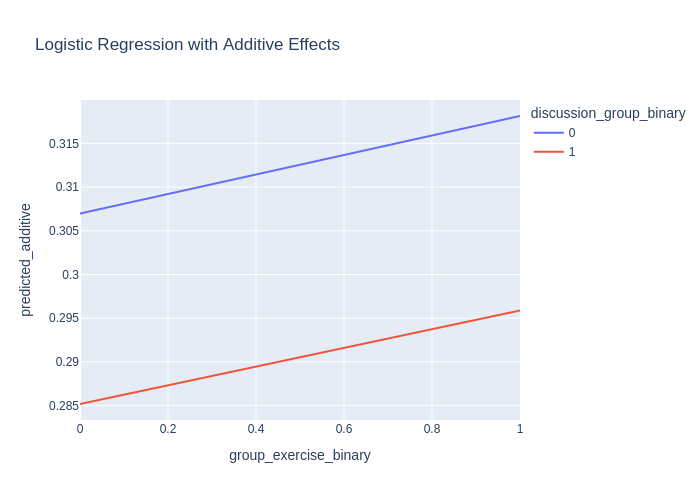

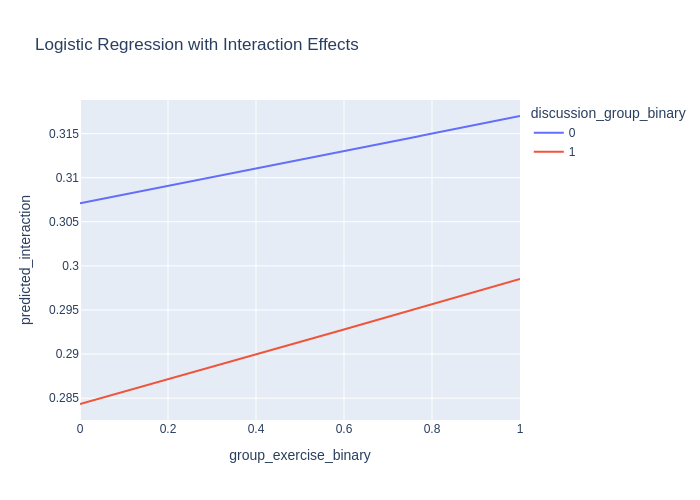

In [3]:
# Additive model plot
fig_additive = px.line(simulated_data, x='group_exercise_binary', y='predicted_additive',
                       color='discussion_group_binary',
                       title="Logistic Regression with Additive Effects")
fig_additive.show(renderer = 'png')

# Interaction model plot
fig_interaction = px.line(simulated_data, x='group_exercise_binary', y='predicted_interaction',
                          color='discussion_group_binary',
                          title="Logistic Regression with Interaction Effects")
fig_interaction.show(renderer = 'png')


Basically, grouping independent variables into a indicator variable and fit the regression model, the coefficients' sign tell which group the outcome is in.

Chatgpt Summary 

https://chatgpt.com/share/67339d09-267c-800b-bc98-520654149705

Summary of Interactions on Logistic Regression Analysis for CSCS Dataset
Initial Instructions and Objectives
Dataset and Variables:

You provided the Canadian Social Connection Survey (CSCS) dataset and identified specific variables for analysis.
Predictors:
CONNECTION_activities_discussion_group_p3m and CONNECTION_activities_group_exercise_p3m, to be used as binary indicator variables (coded as 1 for monthly or more frequent engagement and 0 otherwise).
Outcome Variable:
LONELY_ucla_loneliness_scale_isolated, to be turned into a binary outcome, where "two days or fewer" of isolation would be coded as 1 (indicating low loneliness) and all other values as 0.
Model Requirements:

Fit a logistic regression model, treating it conceptually as if it were a multivariate linear regression to ease interpretation.
Include both additive and interaction terms to assess how predictors individually and jointly influence the likelihood of low loneliness.
Provide visualizations with best-fit lines for both additive and interaction models in a combined graph (using a dashed line to represent an interaction model).
Code Implementation and Adjustments
Dataset Loading and Column Standardization:

Loaded the dataset and standardized column names by stripping spaces and converting them to lowercase.
Identified column names and verified the structure to match the required variables.
Binary Variable Transformation:

Created helper functions to convert the predictor variables (discussion_group_binary and group_exercise_binary) to binary indicators based on monthly frequency or more.
Mapped the loneliness_isolated_binary outcome variable to 1 (low loneliness) if respondents reported isolation "Hardly Ever" (two days or fewer), and 0 for higher loneliness responses.
Logistic Regression Models:

Fit two logistic regression models using statsmodels:
Additive Model: Included only main effects of discussion_group_binary and group_exercise_binary.
Interaction Model: Added an interaction term to assess whether the combined effect of participation in both discussion groups and group exercise was more significant than the sum of their individual effects.
Interpreting Logistic Regression Coefficients:

Discussed how coefficients represent log-odds, with positive coefficients indicating an increased likelihood of the outcome (low loneliness) and negative coefficients indicating a decreased likelihood.
Calculated odds ratios to interpret coefficients more intuitively, as they show the change in odds associated with each predictor.
For interaction terms, a positive coefficient suggested that participating in both activities jointly increased the odds of low loneliness beyond their individual effects.
Visualizing the Results:

Developed code to visualize both the additive and interaction model predictions on a single graph using Plotly, with a dashed line representing the interaction model.
The graph provided a visual representation of the probability of low loneliness based on participation levels in discussion groups and group exercise, highlighting the impact of interaction effects.
Summary of Final Code and Insights
Final code incorporated data cleaning, binary transformations, logistic model fitting, and visualization into a cohesive workflow.
Interpretation of the coefficients focused on identifying which groups (e.g., those participating in both activities) had a higher likelihood of low loneliness.
Visualization displayed additive and interaction effects, helping to determine the significance of the interaction term in explaining loneliness.

4.


In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [5]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        01:02:02   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared and p-values are not contradictory but complementary:

R-square represents the proportion of the variance in the dependent variable y that is predictable from the independent variables in the model.

P-value gives the evidence against null-hypothesis(no effect), indicating that the predictor is statistically significantly associated with the outcome variable(or not).

R-squared informs about the model's explanatory power regarding the variability of the outcome.
P-values and Coefficients inform about the statistical significance and the magnitude of individual predictors' effects.
Thus, they address different aspects of the results:
The p-value(which is small in this case) shows that there is a significant association between the indicator variables and outcome variables; The R-square value(which is small in this case) shows that there are still other varibales influencing much on the outcome variable, and the model may need that varibale to better capture the variability of the outcome.

5.


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [7]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        01:02:02   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [9]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        01:02:02   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [10]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


1. R-squared and Model Performance

In-sample R-squared:

Measures the proportion of variance explained by the model on the training data.
Can be artificially high in complex models due to overfitting.

Out-of-sample R-squared:

Calculated as the squared correlation between actual and predicted values on test data.
Provides a more realistic assessment of predictive performance.

2. Overfitting

Occurs when a model learns the training data too well, including noise.
Overfitted models perform poorly on new data because they fail to capture the underlying patterns.

3. Model Complexity

Adding more variables and interactions increases complexity.
Complex models can capture more nuances but risk overfitting if not properly regularized or validated.

4. Generalizability

A model's ability to perform well on new, unseen data.
Balanced models with appropriate complexity tend to generalize better.

6.


The model4 creates a design matrix by trying to find all the possible interactions among 6 variables, the complexity leads to a very high multicollinearity because a lot of indicators are highly correlated(same underlying variables).

The model fits too much on the noises over the true relationship(overfitting) and it will change a lot due to a small fluctuations in the data.

When using this model to fit the new data, the performance decreases significantly because of the spurious data used to train it, which can be shown in a very low R-square value.

Therefore, the multicollinearity in the design matrix contributes to the lack of out-of-sample generalization of predictions from model4_fit because it undermines the model's ability to identify stable, generalizable relationships between the predictors and the outcome variable.




7.


Incremental Complexity: Gradually increased model complexity to improve performance while monitoring for overfitting.

Evidence-Based Selection: Included predictors and interactions based on statistical significance and theoretical relevance.

Multicollinearity Management: Used centering and scaling to reduce multicollinearity, ensuring stable coefficient estimates.

Model Evaluation: Assessed models using both in-sample and out-of-sample R-squared values to ensure generalizability.

8.


In [11]:
# Number of repetitions
reps = 100

# Arrays to store R-squared values
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

model3_linear_form = 'HP ~ Attack + Defense'

# Loop over the number of repetitions
for i in range(reps):
    # Perform a random train-test split (50-50 split)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model on the training data
    model3_spec = smf.ols(formula=model3_linear_form, data=pokeaman_train)
    model3_fit = model3_spec.fit()
    
    # Calculate in-sample R-squared
    in_sample_Rsquared[i] = model3_fit.rsquared
    
    # Predict on the test data
    yhat_model3 = model3_fit.predict(pokeaman_test)
    
    # Actual HP values from the test set
    y_actual = pokeaman_test['HP']
    
    # Calculate out-of-sample R-squared
    correlation = np.corrcoef(y_actual, yhat_model3)[0, 1]
    out_of_sample_Rsquared[i] = correlation ** 2


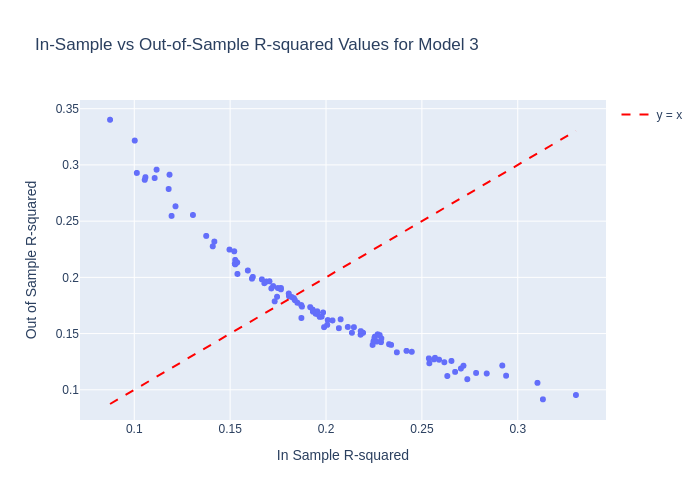

In [15]:
import plotly.express as px
import plotly.graph_objects as go  # Add this line to import 'go'

# Create a DataFrame with the collected R-squared values
df = pd.DataFrame({
    "In Sample R-squared": in_sample_Rsquared,
    "Out of Sample R-squared": out_of_sample_Rsquared
})

# Create a scatter plot
fig = px.scatter(df, x="In Sample R-squared", y="Out of Sample R-squared",
                 title="In-Sample vs Out-of-Sample R-squared Values for Model 3")

# Add a line y = x for reference
fig.add_trace(go.Scatter(x=[df["In Sample R-squared"].min(), df["In Sample R-squared"].max()],
                         y=[df["In Sample R-squared"].min(), df["In Sample R-squared"].max()],
                         mode='lines', name='y = x', line=dict(color='red', dash='dash')))

# Show the plot
fig.show(renderer = 'png')


In [16]:
# Define Model 7's linear form
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

# Number of repetitions
reps = 100

# Arrays to store R-squared values
in_sample_Rsquared_model7 = np.zeros(reps)
out_of_sample_Rsquared_model7 = np.zeros(reps)

# Loop over the number of repetitions
for i in range(reps):
    # Perform a random train-test split (50-50 split)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit Model 7 on the training data
    model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
    model7_fit = model7_spec.fit()
    
    # Calculate in-sample R-squared
    in_sample_Rsquared_model7[i] = model7_fit.rsquared
    
    # Predict on the test data
    yhat_model7 = model7_fit.predict(pokeaman_test)
    
    # Actual HP values from the test set
    y_actual = pokeaman_test['HP']
    
    # Calculate out-of-sample R-squared
    correlation = np.corrcoef(y_actual, yhat_model7)[0, 1]
    out_of_sample_Rsquared_model7[i] = correlation ** 2


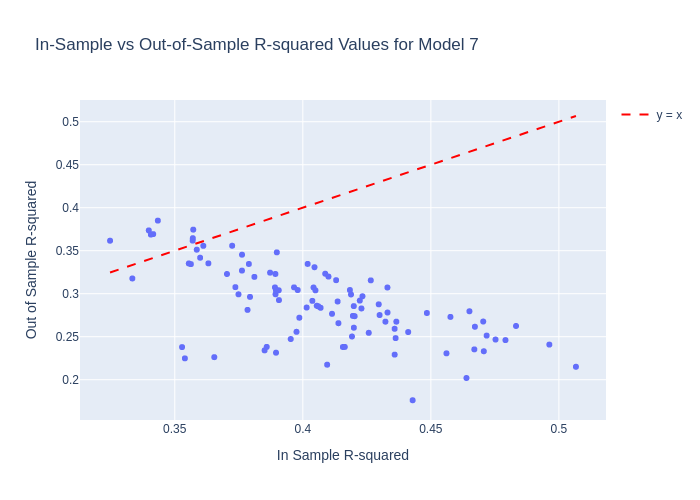

In [18]:
# Create a DataFrame with the collected R-squared values
df_model7 = pd.DataFrame({
    "In Sample R-squared": in_sample_Rsquared_model7,
    "Out of Sample R-squared": out_of_sample_Rsquared_model7
})

# Create a scatter plot
fig_model7 = px.scatter(df_model7, x="In Sample R-squared", y="Out of Sample R-squared",
                        title="In-Sample vs Out-of-Sample R-squared Values for Model 7")

# Add a line y = x for reference
fig_model7.add_trace(go.Scatter(x=[df_model7["In Sample R-squared"].min(), df_model7["In Sample R-squared"].max()],
                                y=[df_model7["In Sample R-squared"].min(), df_model7["In Sample R-squared"].max()],
                                mode='lines', name='y = x', line=dict(color='red', dash='dash')))

# Show the plot
fig_model7.show(renderer = 'png')


meaning of the results:
    
in-sample-rsqaure-value represents how well the model fits the training data, out-sample r-squared value indicates how well the model fits the new and unseen data.

Purpose:

Understand Generalization Ability: Comparing in-sample and out-of-sample R-squared values helps us understand how well the model generalizes to unseen data.

Model Stability: The consistency of R-squared values across iterations suggests that the model's performance is relatively stable.

Generalization: The proximity of in-sample and out-of-sample R-squared values indicates that the model generalizes reasonably well to new data.

Importance of Multiple Splits: Performing multiple train-test splits provides a more comprehensive assessment of the model's predictive capabilities.

A more complex model like Model 7 may show greater variability in out-of-sample performance due to potential overfitting.

9.


If a simpler model performs similarly to a complex one on out-of-sample data, the simpler model is often preferable. Benefits include better interpretability, reduced risk of overfitting, and more consistent generalization.

Testing models on future data (e.g., later generations) provides a more accurate assessment of their predictive capabilities.
Random splits might not capture the challenges of predicting genuinely new data distributions.



Chatgpt Summary: https://chatgpt.com/share/6736b7f2-dabc-800b-a5fe-fdec8e981015
    
Summary of Exchanges:

Throughout our interactions, we delved into various aspects of multiple linear regression using the Pokémon dataset. Here's a summary of our discussions:

Understanding the Apparent Contradiction Between Low R-squared and Significant Coefficients:

We explored why a model can have a low R-squared value (indicating it explains a small proportion of the variance in the dependent variable) while still having statistically significant coefficients.
It was clarified that R-squared measures the overall fit of the model, whereas p-values assess the significance of individual predictors.
We concluded that these concepts are not contradictory; they address different aspects of the model.
Interpreting Regression Output and Coefficients:

We examined a regression model specified as HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation).
Each coefficient in the output was explained, including the intercept, main effects, and interaction terms.
We discussed how to interpret the coefficients, especially in the context of categorical variables and interactions.
In-Sample vs. Out-of-Sample Model Performance:

We discussed the importance of evaluating models using both in-sample and out-of-sample R-squared values.
By splitting the data into training and testing sets, we assessed how well the model generalizes to new data.
We observed that overly complex models may have high in-sample R-squared but perform poorly out-of-sample due to overfitting.
Multicollinearity and Its Impact on Generalization:

We explored how the design matrix in complex models can lead to multicollinearity.
The high condition numbers indicated severe multicollinearity in certain models, contributing to their lack of generalizability.
We discussed how multicollinearity inflates the variance of coefficient estimates, making them unstable.
Model Development from Model3 to Model7:

We traced the progression from simpler to more complex models:
Model3: Included Attack and Defense as predictors.
Model5: Added more predictors, including categorical variables.
Model6: Simplified by selecting significant predictors based on statistical evidence.
Model7: Introduced interaction terms among continuous variables to capture potential nonlinear relationships.
We emphasized the principles of balancing model complexity with generalizability and interpretability.
Visualization of Model Performance Metrics:

We wrote code to perform multiple train-test splits and collected in-sample and out-of-sample R-squared values across iterations.
By plotting these values, we visualized the variability in model performance due to different data splits.
The scatter plots helped us understand the relationship between fitting the training data and predicting new data.
Assessing Model Generalization Using Sequential Data Splits:

We simulated real-world scenarios by training models on earlier generations of Pokémon and testing on later generations.
This approach highlighted that complex models like Model7 may not generalize well to future data.
Simpler models like Model6 showed more consistent performance, reinforcing the importance of model parsimony.
Understanding Overfitting and Model Interpretability:

We recognized that although Model7 had higher in-sample R-squared, it suffered from overfitting.
The complexity of Model7 made it difficult to interpret, especially with higher-order interactions.
We concluded that simpler models are often preferable when they offer comparable predictive performance, due to better interpretability and generalizability.
Debugging and Code Corrections:

We encountered and resolved coding errors related to undefined variables and missing imports.
This process underscored the importance of careful coding practices and thorough debugging.
Purpose and Learning Outcomes:

Model Evaluation: Gained insight into how to evaluate models using both statistical significance and practical predictive performance.
Overfitting Awareness: Recognized the dangers of overfitting with complex models and the importance of validating models on unseen data.
Model Simplicity: Appreciated the value of simpler models for better interpretability and consistent generalization.
Statistical Concepts: Deepened understanding of multicollinearity, condition numbers, and their impact on regression models.
Practical Skills: Enhanced ability to write and debug code for statistical modeling and to visualize and interpret model performance metrics.
Conclusion:

Our exploration reinforced key principles in statistical modeling:

Balance Complexity and Simplicity: Strive for models that are as simple as possible while adequately capturing the underlying patterns in the data.
Validate Models Appropriately: Use realistic data splitting methods that reflect how the model will be used in practice.
Interpretability Matters: Prioritize models that provide meaningful insights and are easier to interpret, especially when predictive performance is similar.
Continuous Learning: Stay attentive to potential pitfalls like multicollinearity and overfitting, and use diagnostic tools to assess model robustness.
This comprehensive examination of multiple linear regression models has provided valuable insights into effective model building and evaluation strategies.    